<a href="https://colab.research.google.com/github/sujinAN33/university_assignment/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%B9%99%EC%96%B4%EC%99%80_%EB%8F%84%EB%AF%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
fish_data=np.column_stack((fish_length,fish_weight)) #colunm_stack은 넘파이에서 전달반은 리스트를 일렬로 세운 다음 나란히 연결한다
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [3]:
fish_target=np.concatenate((np.ones(35),np.zeros(14))) #concatenate는 colunmn_stack과 반대로 리스트를 일렬로 붙인다
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [7]:
#train_test_split()함수는 사이킷런의 model_selection무듈 아래 있으며 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어 준다(나누기 전에 알아서 섞는다)
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,random_state=42) #random_state는 random_seed와 같음
print(train_input.shape,test_input.shape) #2차원배열
print(train_target.shape,test_target.shape) #1차원 배열

(36, 2) (13, 2)
(36,) (13,)


In [8]:
print(test_target) #테스트 세트의 비율이 오리지널의 비율과 맞지 않음: 샘플링 편향

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42) #stratify매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞춰줌

print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
#모델평가
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

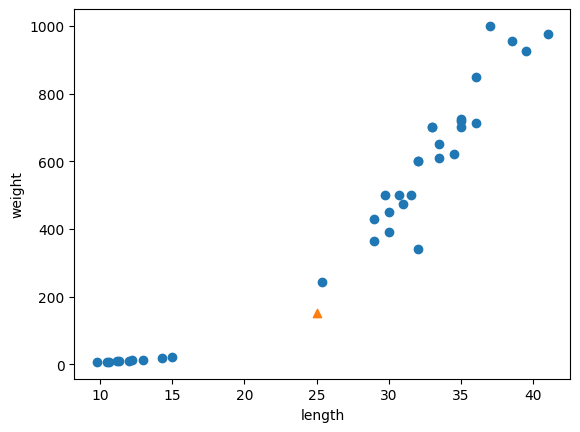

In [11]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

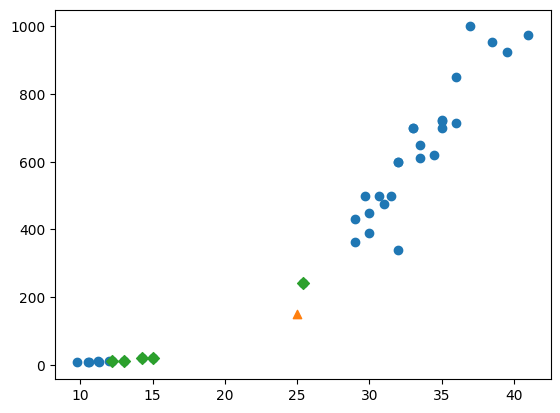

In [12]:
from math import dist
import matplotlib.pyplot as plt
distances,indexes=kn.kneighbors([[25,150]])

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')

In [14]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [15]:
print(distances) #y축이 범위가 넓으므로 조금만 멀어져도 거리가 크게 계산됨

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


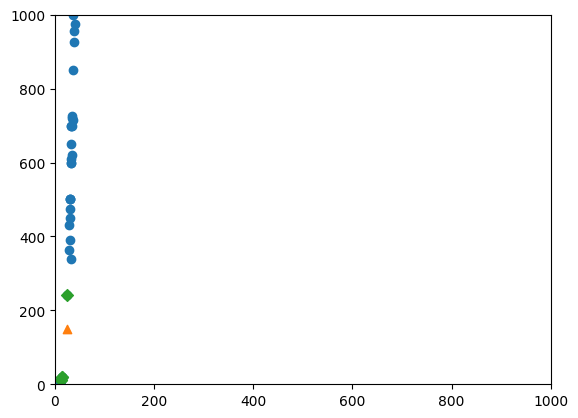

In [17]:
#x축 범위를 y축 범위와 동일하게 0~1000으로 바꾸기
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim([0,1000]) #xlim() x축 범위를 지정하는 함수
plt.ylim([0,1000])
plt.show()

In [19]:
import numpy as np
#표준점수란 각 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다.
mean=np.mean(train_input,axis=0) #axis=0이면 세로줄, 즉 길이별, 무게별로 더해 평균을 구한다
std=np.std(train_input,axis=0)
pltrint(mean,std)

train_scaled=(train_input-mean)/std


[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


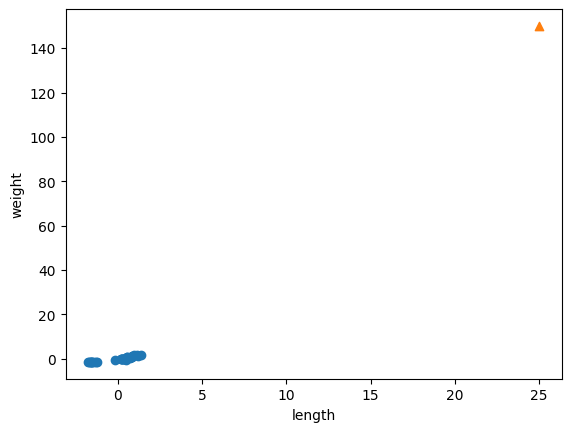

In [20]:
#표준점수로 변환한 train_scaled를 산점도로
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() #[20,150]도 똑같이 변환해주어야 함

Text(0, 0.5, 'weight')

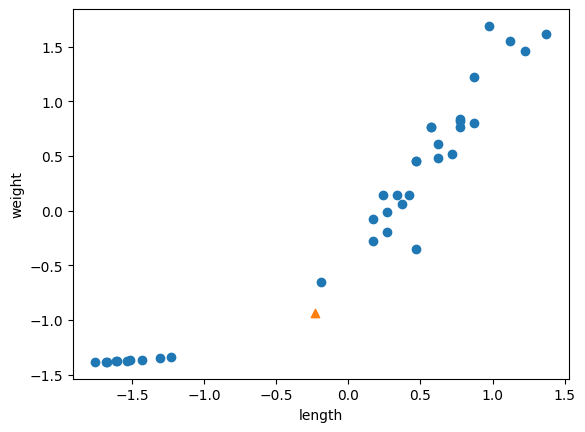

In [21]:
new=([25,150]-mean)/std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight') #표준편차로 변환하기 전의 산점도와 모양이 거의 비슷

In [24]:
from sklearn.neighbors import KNeighborsClassifier
#전처리를 한 데이터셋으로 다시 훈련
kn.fit(train_scaled,train_target)
test_scaled=(test_input-mean)/std
kn.score(test_scaled,test_target)

1.0

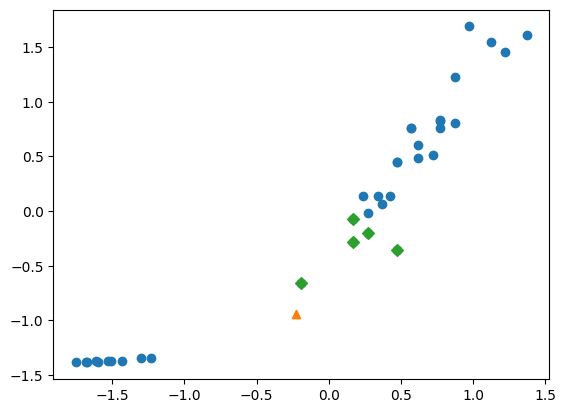

In [25]:
distances,indexes=kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D') #샘플의 두 특성인 길이와 무게의 스케일이 다르기 때문에 문제가 생겼던 것